<a href="https://colab.research.google.com/github/AryanAcharya11/ICT_Assignments/blob/main/SGDUGD_unsupervised_Casestudy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
import seaborn as sns

In [144]:
adult_df = pd.read_csv('/content/adult_dataset.csv')
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [145]:
num_cols = adult_df.select_dtypes(include=['int64','float64'])
num_cols

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39.0,77516,13,2174,0,40.0
1,50.0,83311,13,0,0,13.0
2,38.0,215646,9,0,0,40.0
3,53.0,234721,7,0,0,40.0
4,28.0,338409,13,0,0,40.0
...,...,...,...,...,...,...
48837,39.0,215419,13,0,0,36.0
48838,64.0,321403,9,0,0,40.0
48839,38.0,374983,13,0,0,50.0
48840,44.0,83891,13,5455,0,40.0


In [146]:
cat_cols = adult_df.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [121]:
adult_df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [122]:
num_cols.isna().sum()

np.int64(0)

In [147]:
num_cols.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.075863,0.030357,0.075581,0.057557,0.104259
fnlwgt,-0.075863,1.000000,-0.038761,-0.003706,-0.004366,-0.011411
education-num,0.030357,-0.038761,1.000000,0.125146,0.080972,0.139619
capital-gain,0.075581,-0.003706,0.125146,1.000000,-0.031441,0.081504
capital-loss,0.057557,-0.004366,0.080972,-0.031441,1.000000,0.052353
hours-per-week,0.104259,-0.011411,0.139619,0.081504,0.052353,1.000000


In [148]:
adult_df=adult_df.drop('income',axis=1)
adult_df.drop_duplicates(inplace=True)

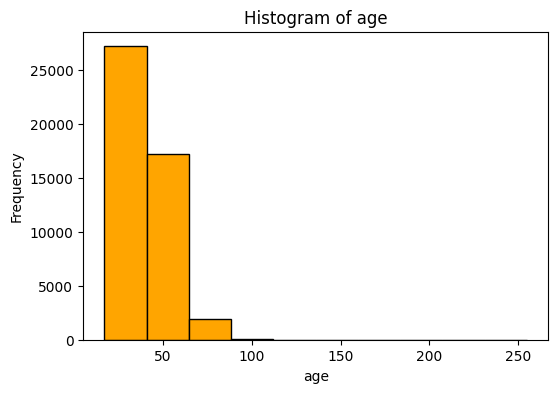

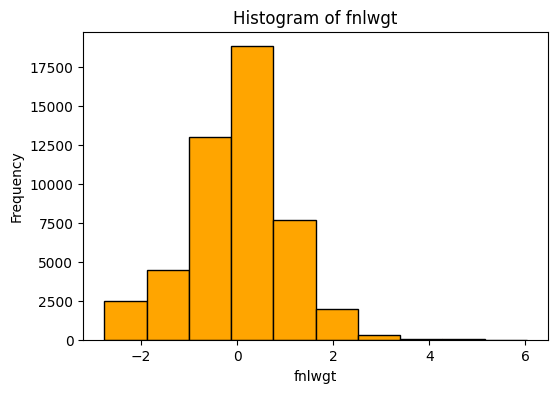

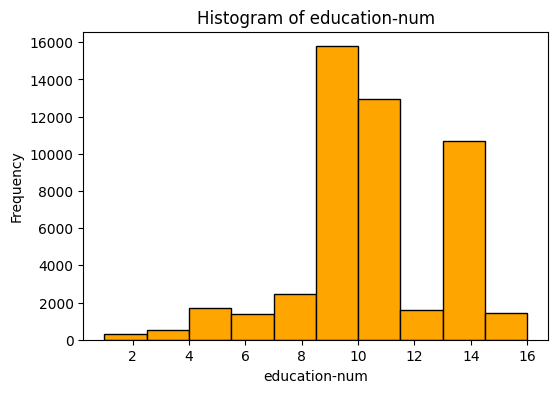

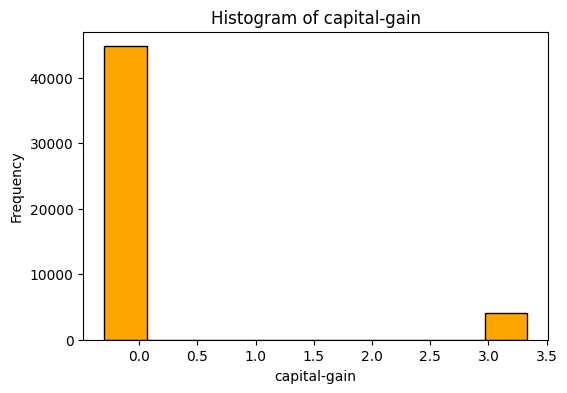

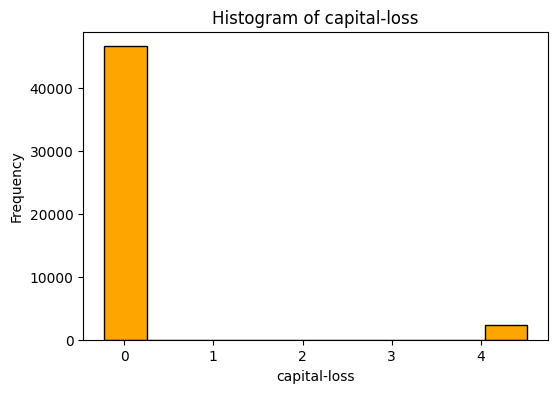

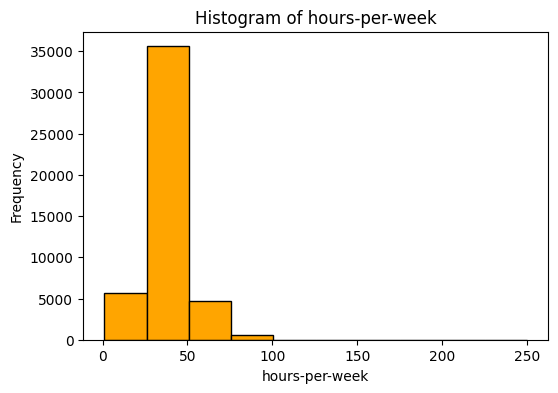

In [149]:
num_cols = adult_df.select_dtypes(include=['number']).columns

# Fix skewness
skew_vals = adult_df[num_cols].skew()
skewed_cols = skew_vals[abs(skew_vals) > 1].index

# Apply PowerTransformer (handles zero/negative values)
pt = PowerTransformer(method='yeo-johnson')
adult_df[skewed_cols] = pt.fit_transform(adult_df[skewed_cols])



for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(adult_df[col], bins=10, color='orange', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Skewness Values:
age: 1.02
fnlwgt: 1.44
education-num: -0.32
capital-gain: 4.21
capital-loss: 4.65
hours-per-week: 0.81


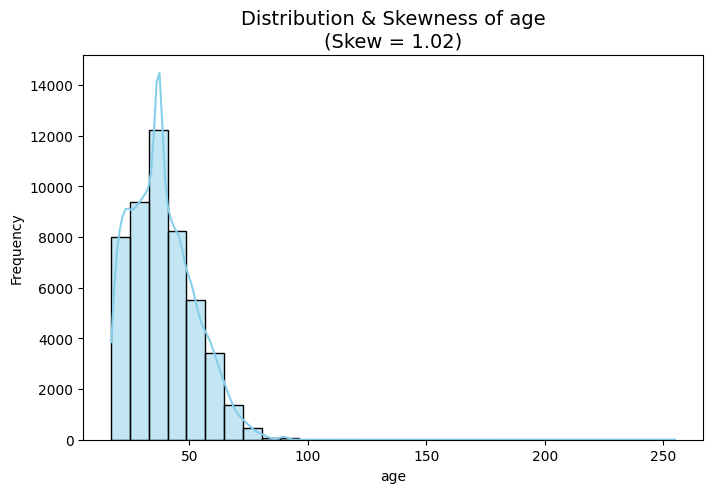

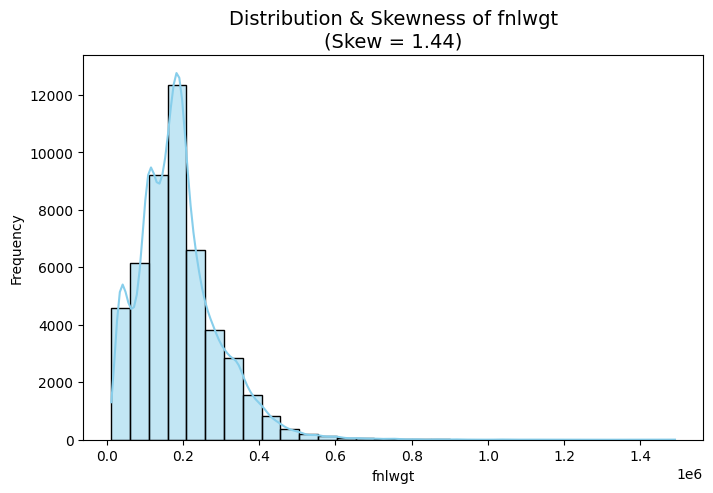

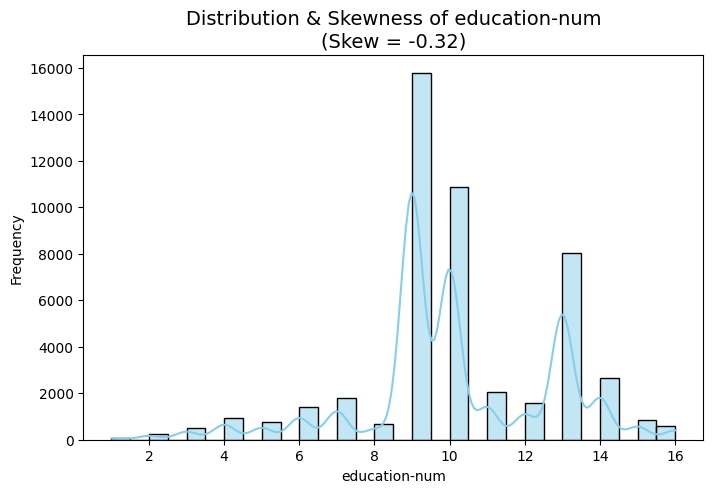

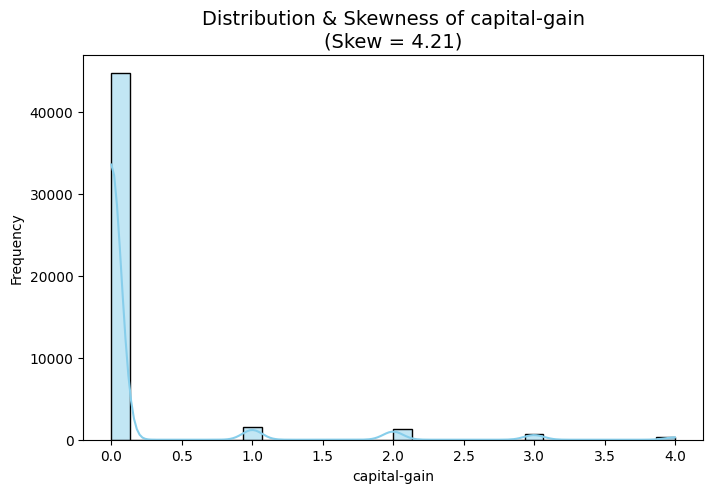

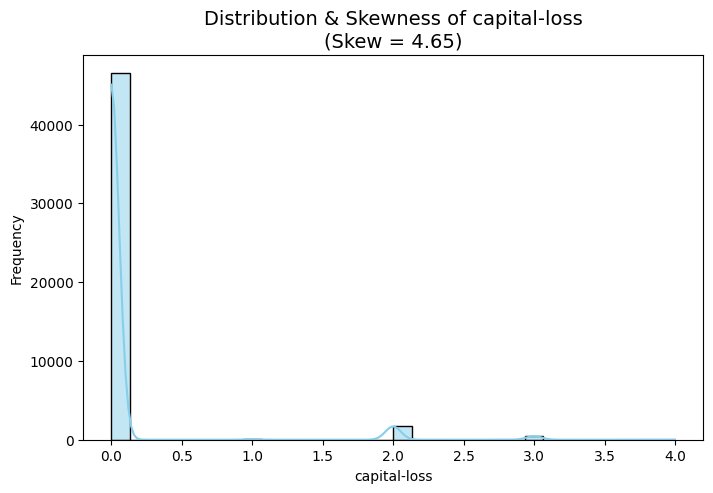

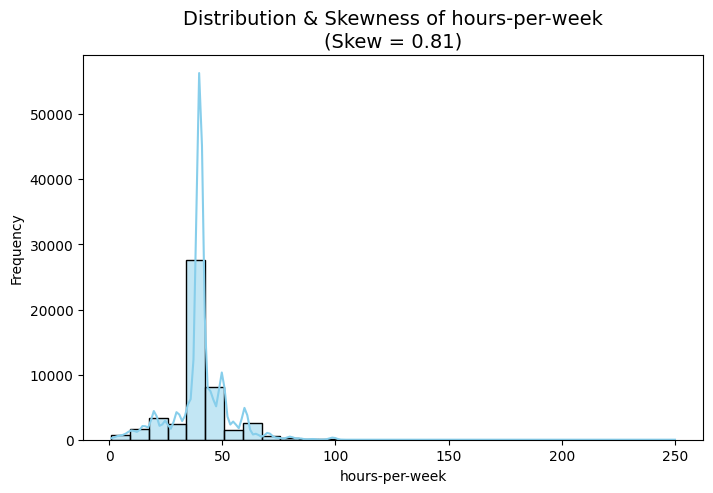

In [124]:
print("\nSkewness Values:")
for col in num_cols:
    skew_val = adult_df[col].skew()
    print(f"{col}: {skew_val:.2f}")

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(adult_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution & Skewness of {col}\n(Skew = {adult_df[col].skew():.2f})', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [125]:
# Fill missing numerical values
adult_df['hours-per-week'] = adult_df['hours-per-week'].fillna(adult_df['hours-per-week'].mean())
adult_df['age'] = adult_df['age'].fillna(adult_df['age'].median())
adult_df['capital-gain'] = adult_df['capital-gain'].fillna(adult_df['capital-gain'].median())
adult_df['capital-loss'] = adult_df['capital-loss'].fillna(adult_df['capital-loss'].median())

# Fill missing categorical values
# Exclude 'income' from cat_cols as it was dropped
cat_cols_updated = [col for col in cat_cols if col != 'income']
for col in cat_cols_updated:
    adult_df[col] = adult_df[col].fillna(adult_df[col].mode()[0])

print("\nMissing Values after handling:")
adult_df.isnull().sum()


Missing Values after handling:


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [126]:
le = LabelEncoder()

# Exclude 'native-country' and 'occupation' from initial Label Encoding
cat_cols_for_le = [col for col in cat_cols_updated if col not in ['native-country', 'occupation']]

for col in cat_cols_for_le:
    adult_df[col] = le.fit_transform(adult_df[col].astype(str))

print("\n✅ Label Encoding done successfully!")
adult_df.head()


✅ Label Encoding done successfully!


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,7,77516,9,13,4,3.0,1,4,1,1.0,0.0,40.0,2.0
1,50.0,6,83311,9,13,2,3.0,0,4,1,0.0,0.0,13.0,3.0
2,38.0,4,215646,11,9,0,1.0,1,4,1,0.0,0.0,40.0,3.0
3,53.0,4,234721,1,7,2,1.0,0,2,1,0.0,0.0,40.0,3.0
4,28.0,4,338409,9,13,2,3.0,5,2,0,0.0,0.0,40.0,2.0


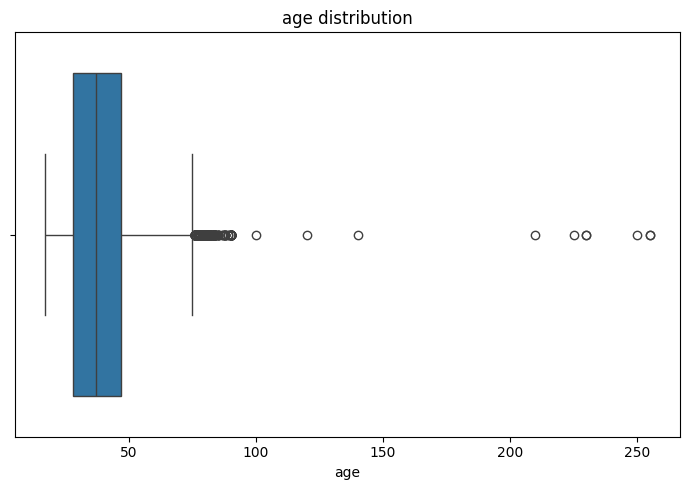

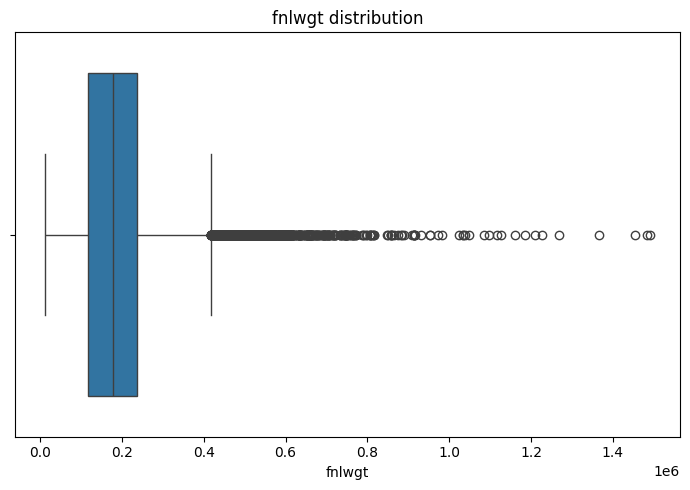

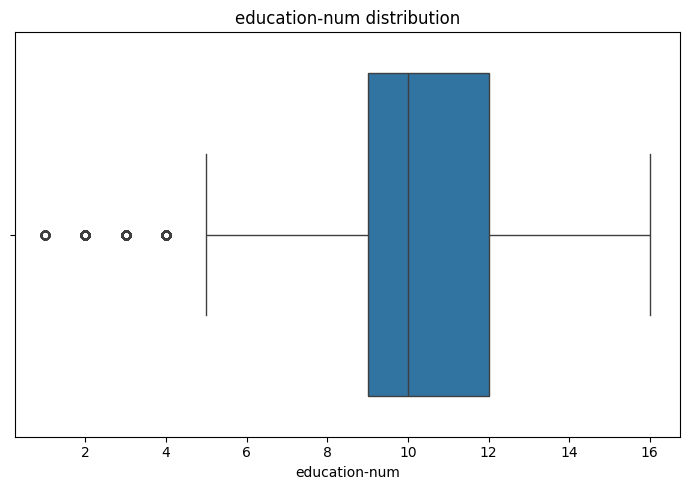

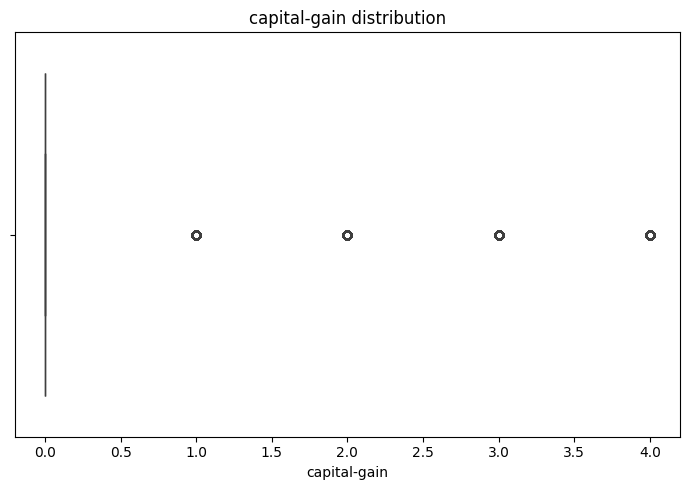

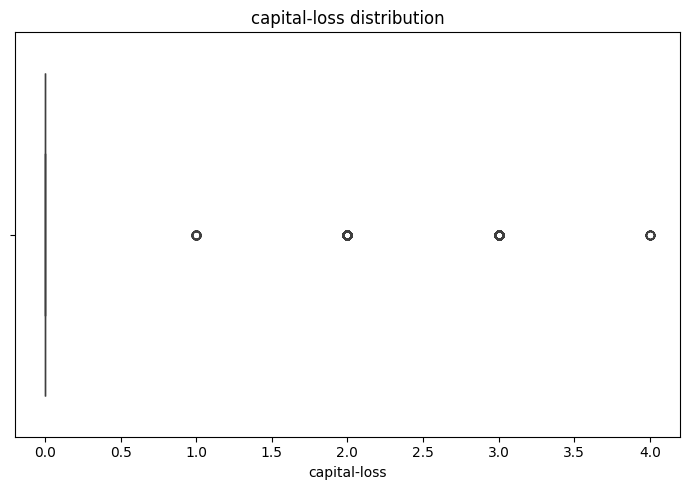

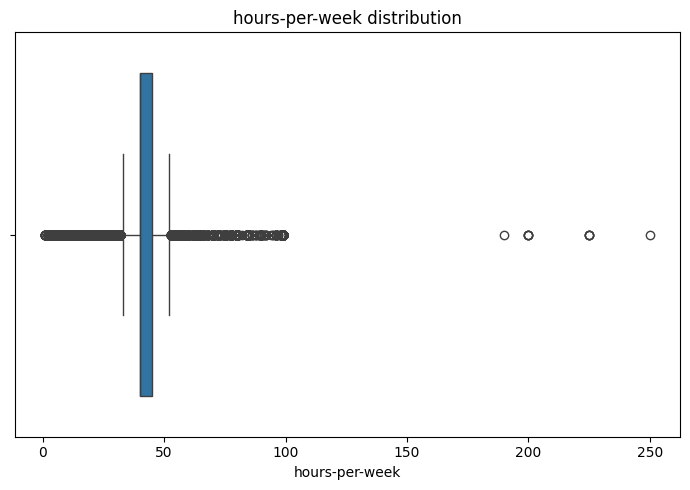

In [127]:
for col in num_cols:
  plt.figure(figsize=(7, 5))
  sns.boxplot(data=adult_df, x=col)
  plt.title(f'{col} distribution')
  plt.tight_layout()
  plt.show()

In [162]:
def clip_outliers_iqr(df, factor=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    df = np.clip(df, lower_bound, upper_bound)
    return df

In [163]:
for col in num_cols:
  adult_df[col] = clip_outliers_iqr(adult_df[col])

In [164]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,-1.178413,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,-0.300175,-0.221448,40.0,United-States
1,50.0,Self-emp-not-inc,-1.087858,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.300175,-0.221448,32.5,United-States
2,38.0,Private,0.400529,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.300175,-0.221448,40.0,United-States
3,53.0,Private,0.564098,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.300175,-0.221448,40.0,United-States
4,28.0,Private,1.340422,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.300175,-0.221448,40.0,Cuba


In [165]:
def binner(df, bins=None, labels=None):
    return pd.cut(df, bins=bins, labels=labels)

In [166]:
gain_bins = [-1, 0, 5000, 10000, 20000, np.inf]
gain_labels = ['none', 'low', 'medium', 'high', 'very_high']

loss_bins = [-1, 0, 1000, 2000, 3000, 5000, np.inf]
loss_labels = ['none', 'low', 'medium', 'high', 'very_high', 'extreme']

adult_df['capital-gain'] = binner(adult_df['capital-gain'], bins=gain_bins, labels=gain_labels)
adult_df['capital-loss'] = binner(adult_df['capital-loss'], bins=loss_bins, labels=loss_labels)

In [167]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,-1.178413,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,none,none,40.0,United-States
1,50.0,Self-emp-not-inc,-1.087858,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,none,none,32.5,United-States
2,38.0,Private,0.400529,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,none,none,40.0,United-States
3,53.0,Private,0.564098,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,none,none,40.0,United-States
4,28.0,Private,1.340422,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,none,none,40.0,Cuba


In [168]:
def group_native_country(data, threshold=0.01):
  freq = data.value_counts(normalize=True)
  moderate = freq[freq > threshold].index.to_list()
  return data.apply(lambda x: x if x in moderate else 'Other')

adult_df['native-country'] = group_native_country(adult_df['native-country'])

In [169]:
def group_occupation(data):
  frequencies = data.value_counts(normalize=True)

  def assign_group(x):
      freq = frequencies.get(x, 0)
      if freq > 0.1:
          return 'Core'
      elif freq > 0.05:
          return 'Major'
      elif freq > 0.01:
          return 'Minor'
      else:
          return 'Rare'

  return data.apply(assign_group)

adult_df['occupation'] = group_occupation(adult_df['occupation'])

In [170]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,-1.178413,Bachelors,13.0,Never-married,Core,Not-in-family,White,Male,none,none,40.0,United-States
1,50.0,Self-emp-not-inc,-1.087858,Bachelors,13.0,Married-civ-spouse,Core,Husband,White,Male,none,none,32.5,United-States
2,38.0,Private,0.400529,HS-grad,9.0,Divorced,Minor,Not-in-family,White,Male,none,none,40.0,United-States
3,53.0,Private,0.564098,11th,7.0,Married-civ-spouse,Minor,Husband,Black,Male,none,none,40.0,United-States
4,28.0,Private,1.340422,Bachelors,13.0,Married-civ-spouse,Core,Wife,Black,Female,none,none,40.0,Other


In [171]:
low_card_cat_cols = ['workclass', 'marital-status', 'relationship', 'race', 'native-country']

In [172]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KMeans(init='k-means++', random_state=42))
])

In [174]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_processed)
print("Chosen components:", pca.n_components_)

Chosen components: 17


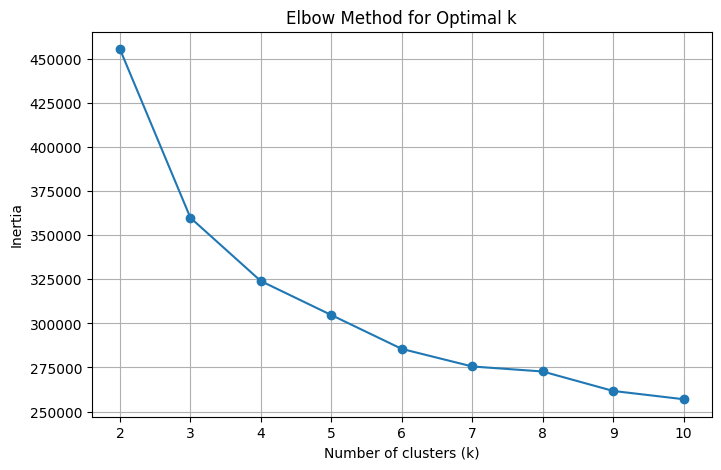

In [176]:
from sklearn.metrics import silhouette_score

wcss = []
sil_scores = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    wcss.append(km.inertia_)
    sil_scores.append(silhouette_score(X_pca, labels))

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

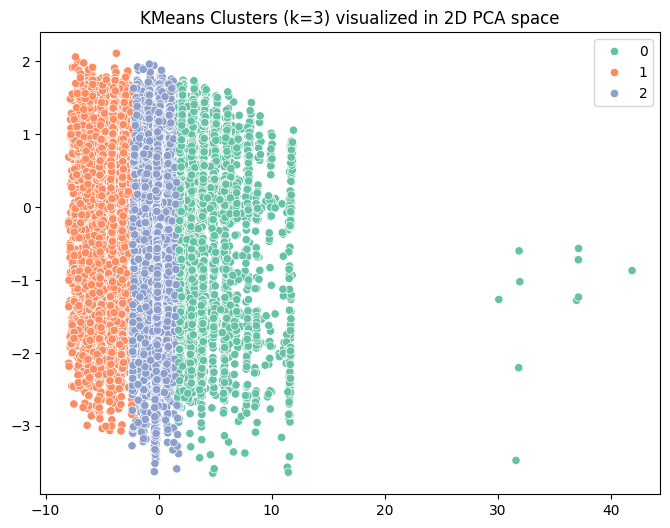

In [141]:
pca_vis = PCA(n_components=3, random_state=42)
X_vis = pca_vis.fit_transform(X_processed)

best_k = 3
km = KMeans(n_clusters=best_k, random_state=42).fit(X_pca)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1],
                hue=km.labels_, palette='Set2')
plt.title(f"KMeans Clusters (k={best_k}) visualized in 2D PCA space")
plt.show()

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=11, random_state=42)),
    ('model', KMeans(n_clusters=3, init='k-means++', random_state=42))
])
pipeline.fit(adult_data)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std_scaler', RobustScaler(),
                                                  ['age', 'hours-per-week']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['workclass',
                                                   'marital-status',
                                                   'relationship', 'race',
                                                   'native-country']),
                                                 ('occupation_encoder',
                                                  OrdinalEncoder(categories=[['Rare',
                                                                              'Minor',
                                                                              'Major',
                                                                              'Core']]),
                                                  ['occupation']),
                                                 ('gain_encoder',
                                                  OrdinalEncoder(categories=[['none',
                                                                              'low',
                                                                              'medium',
                                                                              'high',
                                                                              'very_high']]),
                                                  ['capital-gain']),
                                                 ('loss_encoder',
                                                  OrdinalEncoder(categories=[['none',
                                                                              'low',
                                                                              'medium',
                                                                              'high',
                                                                              'very_high',
                                                                              'extreme']]),
                                                  ['capital-loss'])])),
                ('pca', PCA(n_components=11, random_state=42)),
                ('model', KMeans(n_clusters=3, random_state=42))])

In [ ]:
adult_data['cluster'] = pipeline.named_steps['model'].labels_

In [ ]:
adult_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,cluster
0,39.0,State-gov,13,Never-married,Core,Not-in-family,White,low,none,40.0,United-States,1
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Core,Husband,White,none,none,32.5,United-States,1
2,38.0,Private,9,Divorced,Minor,Not-in-family,White,none,none,40.0,United-States,0
3,53.0,Private,7,Married-civ-spouse,Minor,Husband,Black,none,none,40.0,United-States,2
4,28.0,Private,13,Married-civ-spouse,Core,Wife,Black,none,none,40.0,Other,1


In [ ]:
adult_data['cluster'].value_counts()

,count
cluster,
0,29368
1,13723
2,5751
